In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Taxi_data.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1


In [3]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


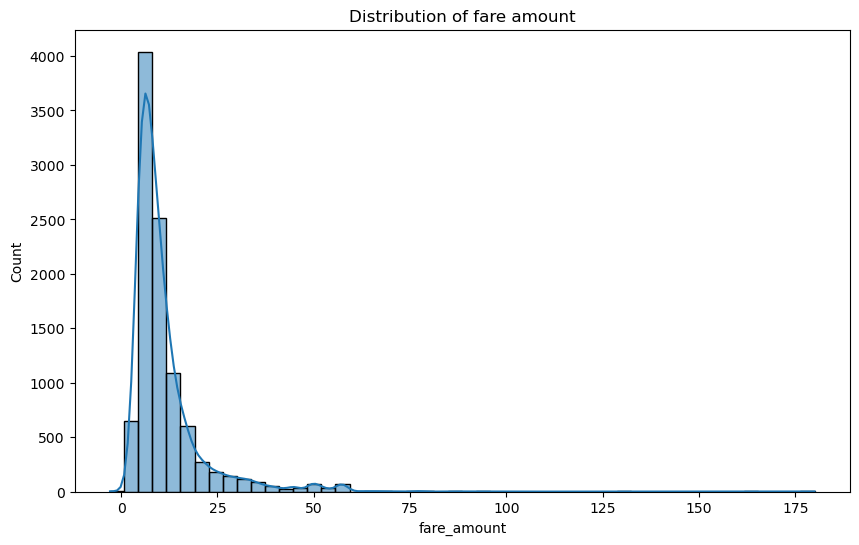

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(df['fare_amount'],bins=50,kde=True)

plt.title('Distribution of fare amount')

plt.show()

In [5]:
# pip install geopy

In [6]:
from geopy.distance import geodesic

def calculate_distance(pickup_lat,
                       pickup_long,
                       dropoff_lat,
                       dropoff_long):

    return geodesic((pickup_lat,pickup_long),
                     (dropoff_lat,dropoff_long)).miles



In [7]:
df = df[(df['pickup_latitude']<=90) & (df['pickup_latitude']>=-90)]
df.shape

(9998, 8)

In [8]:
import warnings 

warnings.filterwarnings('ignore')

In [10]:
df['distance'] = df.apply(lambda row: calculate_distance(row['pickup_latitude'],
                                        row['pickup_longitude'],
                                        row['dropoff_latitude'],
                                        row['dropoff_longitude']),axis=1)

print('done')

done


In [13]:
df['pickup_datetime'].info()

<class 'pandas.core.series.Series'>
Index: 9998 entries, 0 to 9998
Series name: pickup_datetime
Non-Null Count  Dtype              
--------------  -----              
9998 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 156.2 KB


In [15]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [16]:
df['pickup_datetime'].dt.month

0        4
1        6
2        1
3        8
4        4
        ..
9994     2
9995     8
9996    10
9997    12
9998    11
Name: pickup_datetime, Length: 9998, dtype: int32

In [17]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df['second'] = df['pickup_datetime'].dt.second

In [18]:
df.shape

(9998, 15)

In [19]:
df = df.drop(['pickup_datetime'],axis=1)

In [20]:
x = df.drop(['fare_amount','key'],axis=1)
y = df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)

rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [30]:
y_pred = rf.predict(x_test)
y_pred

array([ 6.77   , 34.1539 , 12.7375 , ..., 56.16905, 21.06985,  7.7235 ])

In [31]:
mse = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(r2)
print(rmse)
print(mse)

0.7570603004463827
1.5210973012927218
2.313737000000001


In [33]:
rf.score(x_test,y_test)

0.7570603004463827

In [34]:
dummy_data = x.sample().to_numpy()

rf.predict(dummy_data)[0]

28.95899999999999